## Dataset Merging

In [16]:
import pandas as pd
import numpy as np

# 1. Load the datasets
path_atmos = '/content/drive/MyDrive/MTP/reanalysis-era5-single-levels-timeseries-sfc77b27kue.csv'
path_waves = '/content/drive/MyDrive/MTP/reanalysis-era5-single-levels-timeseries-wav2f35la9d.csv'

df_atmos = pd.read_csv(path_atmos)
df_waves = pd.read_csv(path_waves)

# 2. Standardize Time Format
# ERA5 CSVs usually name the time column 'valid_time' or 'time'.
# We ensure they are datetime objects to prevent merging errors.
# (I am assuming the time column is named 'valid_time' based on standard CDS output)
time_col = 'valid_time'

df_atmos[time_col] = pd.to_datetime(df_atmos[time_col])
df_waves[time_col] = pd.to_datetime(df_waves[time_col])

# 3. Merge the datasets
# We use an 'inner' join to keep only the rows where timestamps match perfectly
df_final = pd.merge(df_atmos, df_waves, on=time_col, how='inner')

# 4. Feature Engineering: Calculate Wind Speed
# u10 and v10 are vector components. The model learns better from scalar Wind Speed.
# Formula: Speed = sqrt(u^2 + v^2)
df_final['wind_speed'] = np.sqrt(df_final['u10']**2 + df_final['v10']**2)

# 5. Drop Unnecessary Columns
# - 'latitude', 'longitude': They are constant (19, 72.5) and don't help prediction.
# - 'u10', 'v10': We replaced these with 'wind_speed'.
cols_to_drop = ['latitude_x','latitude_y','longitude_y','longitude_x','u10', 'v10']
df_final = df_final.drop(columns=cols_to_drop)

# 6. Set Time as the Index
df_final.set_index(time_col, inplace=True)

# 7. Final Inspection
print("Dataset Shape:", df_final.shape)
print("\nFirst 5 rows:")
print(df_final.head())

# Check for any missing values (NaN)
print("\nMissing values per column:")
print(df_final.isnull().sum())

Dataset Shape: (139296, 7)

First 5 rows:
                            msl       sst          sp        mwd       mwp  \
valid_time                                                                   
2010-01-01 00:00:00  101009.000  299.7046  101058.860  343.75830  5.233638   
2010-01-01 01:00:00  101068.375  299.7046  101118.945  343.22980  5.301225   
2010-01-01 02:00:00  101124.440  299.7046  101174.164  342.24340  5.221418   
2010-01-01 03:00:00  101232.310  299.7046  101282.850  342.66610  5.238995   
2010-01-01 04:00:00  101300.810  299.7046  101351.200  341.87527  5.292376   

                          swh  wind_speed  
valid_time                                 
2010-01-01 00:00:00  0.725228    4.506373  
2010-01-01 01:00:00  0.698716    4.453046  
2010-01-01 02:00:00  0.640057    4.298387  
2010-01-01 03:00:00  0.621451    4.338031  
2010-01-01 04:00:00  0.602679    4.124445  

Missing values per column:
msl           0
sst           0
sp            0
mwd           0
mwp        

In [17]:
df_final

,msl,sst,sp,mwd,mwp,swh,wind_speed
valid_time,,,,,,,
2010-01-01 00:00:00,101009.000,299.7046,101058.860,343.75830,5.233638,0.725228,4.506373
2010-01-01 01:00:00,101068.375,299.7046,101118.945,343.22980,5.301225,0.698716,4.453046
2010-01-01 02:00:00,101124.440,299.7046,101174.164,342.24340,5.221418,0.640057,4.298387
2010-01-01 03:00:00,101232.310,299.7046,101282.850,342.66610,5.238995,0.621451,4.338031
2010-01-01 04:00:00,101300.810,299.7046,101351.200,341.87527,5.292376,0.602679,4.124445
...,...,...,...,...,...,...,...
2025-11-21 19:00:00,101384.060,300.3208,101434.090,245.03372,6.844941,0.714854,5.473773
2025-11-21 20:00:00,101352.250,300.3208,101402.390,244.56352,6.865094,0.715410,5.202386
2025-11-21 21:00:00,101294.750,300.3208,101345.030,241.91458,6.930945,0.711450,4.919906


## Exploratory Data Analysis

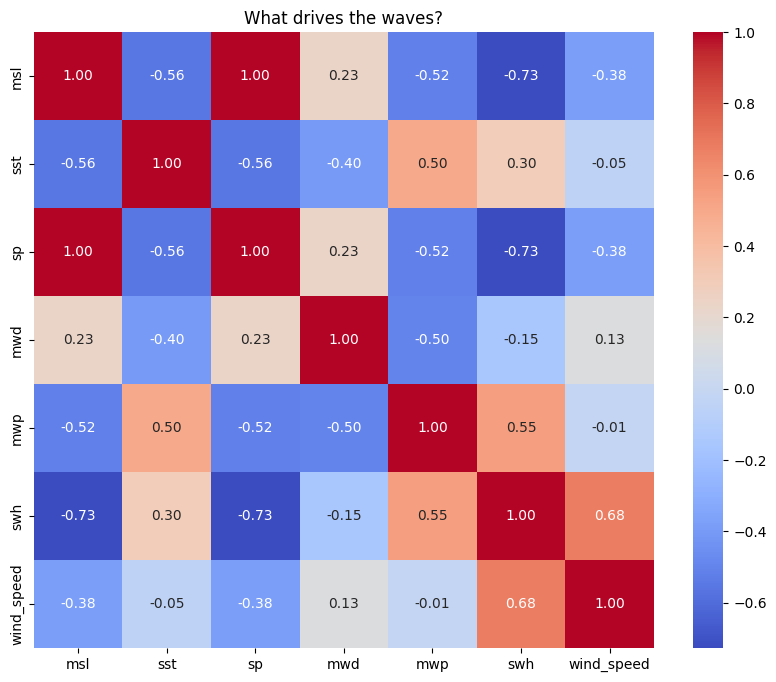

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr = df_final.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("What drives the waves?")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# ==========================================
# 1. SETUP
# ==========================================
# We assume 'df_final' is already loaded from your previous steps.
# If not, uncomment the lines below to load it:
# df_final = pd.read_csv('your_merged_data.csv')
# df_final['valid_time'] = pd.to_datetime(df_final['valid_time'])
# df_final.set_index('valid_time', inplace=True)

# Set professional style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 120

# Define the key variables to analyze
variables = {
    'swh': {'label': 'Sig. Wave Height (m)', 'color': '#1f77b4'}, # Blue
    'mwp': {'label': 'Mean Wave Period (s)', 'color': '#2ca02c'}, # Green
    'wind_speed': {'label': 'Wind Speed (m/s)', 'color': '#ff7f0e'}, # Orange
    'msl': {'label': 'Mean Sea Level Pressure (Pa)', 'color': '#9467bd'}, # Purple
    'sst': {'label': 'Sea Surface Temp (K)', 'color': '#d62728'} # Red
}

# ==========================================
# 2. PLOT 1: LONG-TERM TIME SERIES (Daily Trends)
# ==========================================
print("Generating Long-Term Time Series Plot...")

# Resample to Daily Mean to reduce noise (100k points -> 4k points)
df_daily = df_final.resample('D').mean()

fig, axes = plt.subplots(len(variables), 1, figsize=(12, 18), sharex=True)

for i, (col, info) in enumerate(variables.items()):
    ax = axes[i]
    ax.plot(df_daily.index, df_daily[col], color=info['color'], linewidth=0.7)
    ax.set_ylabel(info['label'], fontweight='bold')
    ax.grid(True, alpha=0.3)

    # Highlight Monsoon Season (June-Sept) roughly with shading
    # (Optional visual flair)
    # ax.axvspan('2022-06-01', '2022-09-30', color='gray', alpha=0.1)

axes[0].set_title("13-Year Historical Trends (Daily Averages)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.tight_layout()
plt.show()

# ==========================================
# 3. PLOT 2: SEASONAL BOXPLOTS (The "Professor Pleaser")
# ==========================================
print("Generating Seasonal Boxplots...")

# Create a temporary dataframe with Month column
df_seasonal = df_final.copy()
df_seasonal['Month'] = df_seasonal.index.month

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Seasonal Analysis: Identifying the Monsoon Effect", fontsize=16, fontweight='bold')

# Helper to plot boxplots
def plot_box(ax, col, title):
    sns.boxplot(x='Month', y=col, data=df_seasonal, ax=ax, palette="viridis", fliersize=1)
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel("Month (1=Jan, 12=Dec)")

plot_box(axes[0,0], 'swh', "Wave Height Distribution by Month")
plot_box(axes[0,1], 'wind_speed', "Wind Speed Distribution by Month")
plot_box(axes[1,0], 'msl', "Pressure Distribution (Note the Monsoon Drop)")
plot_box(axes[1,1], 'mwp', "Wave Period Distribution")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# ==========================================
# 4. PLOT 3: CORRELATION ZOOM (One Year View)
# ==========================================
print("Generating 1-Year Zoom Plot...")

# Focus on a recent full year (e.g., 2022)
target_year = '2022'
df_zoom = df_final.loc[target_year]

fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot Wind Speed on Left Axis
color1 = 'tab:orange'
ax1.set_xlabel('Date (2022)')
ax1.set_ylabel('Wind Speed (m/s)', color=color1, fontweight='bold')
ax1.plot(df_zoom.index, df_zoom['wind_speed'], color=color1, alpha=0.6, linewidth=1, label='Wind Speed')
ax1.tick_params(axis='y', labelcolor=color1)

# Create Right Axis for Wave Height
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('Wave Height (m)', color=color2, fontweight='bold')
ax2.plot(df_zoom.index, df_zoom['swh'], color=color2, alpha=0.8, linewidth=1.5, label='Wave Height')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title(f"Wind vs. Waves Correlation ({target_year})", fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
fig.tight_layout()
plt.show()

## Preparing Datasets


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 1. Drop redundant column (sp is identical to msl)
if 'sp' in df_final.columns:
    df_final = df_final.drop(columns=['sp'])

# 2. Define Features and Targets
# Inputs: Pressure, Temp, Wind Speed, plus past values of waves
FEATURE_COLS = ['msl', 'sst', 'wind_speed', 'swh', 'mwp', 'mwd']
TARGET_COLS = ['swh', 'mwp', 'mwd']

# 3. Split Data by Date (Crucial Step!)
train_df = df_final.loc['2010-01-01':'2023-12-31']
test_df = df_final.loc['2024-01-01':]

print(f"Training Days: {len(train_df) // 24}")
print(f"Testing Days: {len(test_df) // 24}")

# 4. Scale the Data (Fit scaler ONLY on training data to avoid leaking future info)
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_df[FEATURE_COLS])
test_scaled = scaler.transform(test_df[FEATURE_COLS]) # Use same scaler for test

# Target scaler for inverse transformation later
target_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler.fit(train_df[TARGET_COLS])

Training Days: 5113
Testing Days: 691


MinMaxScaler()

In [9]:
def create_dataset(dataset, look_back=24):
    X, y = [], []
    # dataset shape: [rows, features]
    # We stop look_back steps before the end
    for i in range(look_back, len(dataset)):
        X.append(dataset[i-look_back:i])  # Take past 24 hours
        y.append(dataset[i, 3:6])         # Take current swh, mwp, mwd (indices 3,4,5 in FEATURE_COLS)
    return np.array(X), np.array(y)

LOOKBACK = 24
X_train, y_train = create_dataset(train_scaled, LOOKBACK)
X_test, y_test = create_dataset(test_scaled, LOOKBACK)

print("Data Prepared!")
print(f"X_train shape: {X_train.shape}") # (Samples, 24, 6)

Data Prepared!
X_train shape: (122688, 24, 6)


##

## Model Training and evaluation for the next hour

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

# Build LSTM
model_lstm = Sequential()
# Input shape is (24 hours, 6 features)
model_lstm.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(LSTM(64, return_sequences=True)) # Layer 1
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(32, return_sequences=False)) # Layer 2
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(3)) # Output: swh, mwp, mwd

model_lstm.compile(optimizer='adam', loss='mse')

# Train
print("Training LSTM...")
history = model_lstm.fit(X_train, y_train, epochs=15, batch_size=64,
                         validation_data=(X_test, y_test), verbose=1)

Training LSTM...
Epoch 1/15
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 59s 29ms/step - loss: 0.0088 - val_loss: 0.0013
Epoch 2/15
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - loss: 0.0020 - val_loss: 9.3727e-04
Epoch 3/15
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - loss: 0.0013 - val_loss: 9.2149e-04
Epoch 4/15
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - loss: 0.0012 - val_loss: 9.1891e-04
Epoch 5/15
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - loss: 0.0012 - val_loss: 9.2397e-04
Epoch 6/15
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - loss: 0.0012 - val_loss: 9.0126e-04
Epoch 7/15
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - loss: 0.0012 - val_loss: 8.5802e-04
Epoch 8/15
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - loss: 0.0013 - val_loss: 8.8190e-04
Epoch 9/15
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - loss: 0.0011 - val_loss: 8.9204e-04
Epoch 10/15
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - loss: 0.0011 - val_loss: 8.5456e-04
Epoch 11/15
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 56s

In [11]:
from sklearn.metrics import r2_score

# 1. Predict
y_pred_lstm = model_lstm.predict(X_test)
# y_pred_xgb = xgb_model.predict(X_test_flat)

# 2. Inverse Scale (Convert 0-1 back to Meters and Seconds)
y_test_real = target_scaler.inverse_transform(y_test)
y_pred_lstm_real = target_scaler.inverse_transform(y_pred_lstm)
# y_pred_xgb_real = target_scaler.inverse_transform(y_pred_xgb)

# 3. Calculate Scores
print("--- LSTM Results ---")
print(f"Height (SWH) R2: {r2_score(y_test_real[:,0], y_pred_lstm_real[:,0]):.4f}")
print(f"Period (MWP) R2: {r2_score(y_test_real[:,1], y_pred_lstm_real[:,1]):.4f}")

#print("\n--- XGBoost Results ---")
#print(f"Height (SWH) R2: {r2_score(y_test_real[:,0], y_pred_xgb_real[:,0]):.4f}")
#print(f"Period (MWP) R2: {r2_score(y_test_real[:,1], y_pred_xgb_real[:,1]):.4f}")

518/518 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step
--- LSTM Results ---
Height (SWH) R2: 0.9980
Period (MWP) R2: 0.9965


In [12]:
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor

# 1. Flatten the data for XGBoost
# Reshape from (Samples, 24, 6) -> (Samples, 24*6)
nsamples, ntime, nfeatures = X_train.shape
X_train_flat = X_train.reshape((nsamples, ntime*nfeatures))

nsamples_test, _, _ = X_test.shape
X_test_flat = X_test.reshape((nsamples_test, ntime*nfeatures))

# 2. Initialize XGBoost
# We use MultiOutputRegressor because XGBoost normally predicts only 1 thing at a time
xgb_model = MultiOutputRegressor(XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=6))

# 3. Train
print("Training XGBoost...")
xgb_model.fit(X_train_flat, y_train)
print("XGBoost Training Complete!")

Training XGBoost...
XGBoost Training Complete!


In [13]:
from sklearn.metrics import r2_score

# 1. Predict
y_pred_lstm = model_lstm.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test_flat)

# 2. Inverse Scale (Convert 0-1 back to Meters and Seconds)
y_test_real = target_scaler.inverse_transform(y_test)
y_pred_lstm_real = target_scaler.inverse_transform(y_pred_lstm)
y_pred_xgb_real = target_scaler.inverse_transform(y_pred_xgb)

# 3. Calculate Scores
print("--- LSTM Results ---")
print(f"Height (SWH) R2: {r2_score(y_test_real[:,0], y_pred_lstm_real[:,0]):.4f}")
print(f"Period (MWP) R2: {r2_score(y_test_real[:,1], y_pred_lstm_real[:,1]):.4f}")

#print("\n--- XGBoost Results ---")
print(f"Height (SWH) R2: {r2_score(y_test_real[:,0], y_pred_xgb_real[:,0]):.4f}")
print(f"Period (MWP) R2: {r2_score(y_test_real[:,1], y_pred_xgb_real[:,1]):.4f}")

518/518 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step
--- LSTM Results ---
Height (SWH) R2: 0.9980
Period (MWP) R2: 0.9965
Height (SWH) R2: 0.9992
Period (MWP) R2: 0.9975


In [14]:
from sklearn.metrics import r2_score

# ==========================================
# FUNCTION: CALCULATE ADJUSTED R2
# ==========================================
def adjusted_r2(y_true, y_pred, X_shape):
    """
    Calculates Adjusted R2.
    n = number of samples
    p = number of predictors (features * timesteps)
    """
    n = len(y_true)

    # For LSTM/XGBoost, the "number of predictors" (p) is the total input size
    # shape[1] is lookback (24), shape[2] is features (6) -> p = 144
    p = X_shape[1] * X_shape[2]

    r2 = r2_score(y_true, y_pred)

    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adj_r2

# ==========================================
# CALCULATE & PRINT
# ==========================================

# 1. Calculate for LSTM
lstm_adj_r2_swh = adjusted_r2(y_test_real[:,0], y_pred_lstm_real[:,0], X_test.shape)
lstm_adj_r2_mwp = adjusted_r2(y_test_real[:,1], y_pred_lstm_real[:,1], X_test.shape)

# 2. Calculate for XGBoost (using same X_test shape logic)
xgb_adj_r2_swh = adjusted_r2(y_test_real[:,0], y_pred_xgb_real[:,0], X_test.shape)
xgb_adj_r2_mwp = adjusted_r2(y_test_real[:,1], y_pred_xgb_real[:,1], X_test.shape)

print("\n" + "="*40)
print("ADJUSTED R-SQUARED SCORES")
print("="*40)
print(f"{'Metric':<20} | {'LSTM Adj.R2':<12} | {'XGBoost Adj.R2':<12}")
print("-" * 55)
print(f"{'Wave Height (SWH)':<20} | {lstm_adj_r2_swh:.6f}       | {xgb_adj_r2_swh:.6f}")
print(f"{'Wave Period (MWP)':<20} | {lstm_adj_r2_mwp:.6f}       | {xgb_adj_r2_mwp:.6f}")

# Sanity Check: Is it just "Persistence"?
# Calculate how good the prediction would be if we just said
# "Next hour's wave = Current hour's wave"
y_test_shifted = y_test_real[1:, 0]      # Actual wave at T+1
y_persistence = y_test_real[:-1, 0]      # We predict it is same as T
persistence_score = r2_score(y_test_shifted, y_persistence)

print("-" * 55)
print(f"BASELINE (Persistence): {persistence_score:.4f}")
print("(If your models are not significantly higher than this baseline,")
print(" they are just learning that 'waves don't change much quickly'.)")


ADJUSTED R-SQUARED SCORES
Metric               | LSTM Adj.R2  | XGBoost Adj.R2
-------------------------------------------------------
Wave Height (SWH)    | 0.998026       | 0.999180
Wave Period (MWP)    | 0.996520       | 0.997505
-------------------------------------------------------
BASELINE (Persistence): 0.9990
(If your models are not significantly higher than this baseline,
 they are just learning that 'waves don't change much quickly'.)


## Model Training And Evaluation for next 6 hours , 12 hours , 18 hours

In [18]:
# CHANGE THIS IN YOUR CODE
def create_dataset(dataset, look_back=24, lead_time=6): # <--- Add lead_time
    X, y = [], []
    # We stop (look_back + lead_time) steps before the end
    for i in range(look_back, len(dataset) - lead_time):
        X.append(dataset[i-look_back:i])       # Past 24 hours
        # PREDICT THE FUTURE: i + lead_time
        y.append(dataset[i + lead_time, 3:6])  # Target is 6 hours AHEAD
    return np.array(X), np.array(y)

# Re-run training with lead_time=6 or 12
X_train, y_train = create_dataset(train_scaled, LOOKBACK, lead_time=6)
X_test, y_test = create_dataset(test_scaled, LOOKBACK, lead_time=6)

CONFIGURATION: Input=24h -> Predict=6h ahead

Generating datasets...
X_test shape: (16554, 24, 6)
y_test shape: (16554, 3)

Building LSTM Model...
Starting Training...
Epoch 1/20
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 73s 35ms/step - loss: 0.0110 - val_loss: 0.0043
Epoch 2/20
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 71s 37ms/step - loss: 0.0049 - val_loss: 0.0040
Epoch 3/20
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 68s 35ms/step - loss: 0.0040 - val_loss: 0.0042
Epoch 4/20
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 5/20
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 84s 35ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 6/20
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 7/20
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 8/20
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - loss: 0.0033 - val_loss: 0.0037
Epoch 9/20
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 69s 36ms/step - loss: 0.0033 - val_loss: 0.0036
Epoch 10/20
1917/1917 

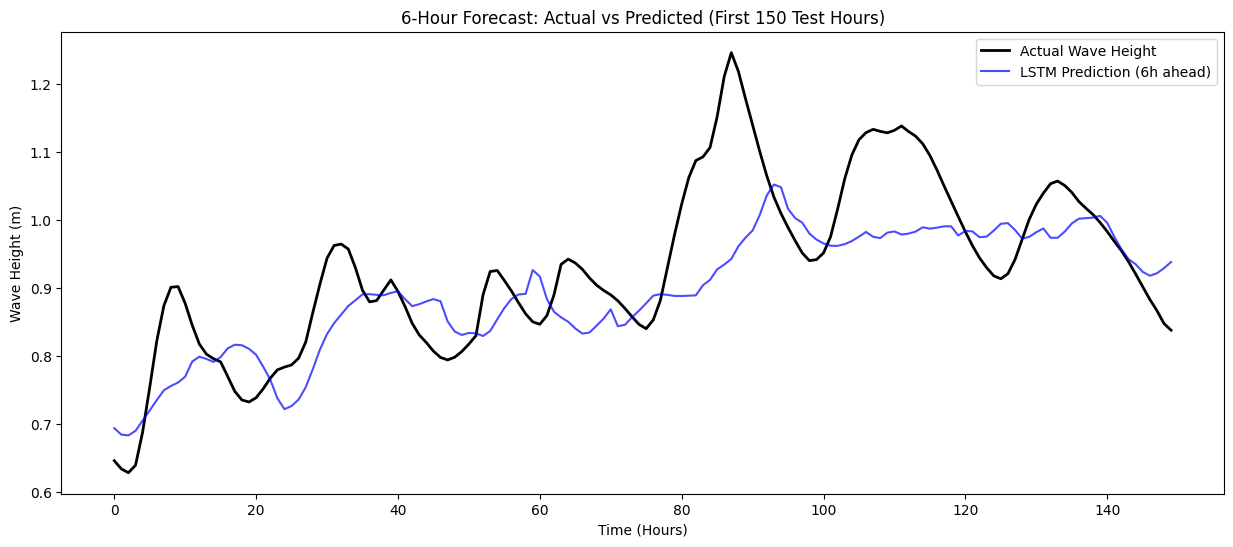

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score

# ==========================================
# 1. CONFIGURATION
# ==========================================
LOOKBACK = 24    # Past 24 hours
LEAD_TIME = 6    # Predict 6 hours ahead

print(f"CONFIGURATION: Input={LOOKBACK}h -> Predict={LEAD_TIME}h ahead")

# ==========================================
# 2. DATA GENERATOR (Ensures strict alignment)
# ==========================================
def create_dataset(dataset, look_back, lead_time):
    X, y = [], []
    # Loop range: stop early enough so we have both past (X) and future (y) data
    # Total usable length = len(dataset) - look_back - lead_time
    for i in range(look_back, len(dataset) - lead_time):
        X.append(dataset[i-look_back:i])       # Input: Past 24h
        y.append(dataset[i + lead_time, 3:6])  # Target: Future (i + 6h) [swh, mwp, mwd]
    return np.array(X), np.array(y)

# Force re-generation of all datasets to guarantee matching shapes
print("\nGenerating datasets...")
X_train, y_train = create_dataset(train_scaled, LOOKBACK, LEAD_TIME)
X_test, y_test = create_dataset(test_scaled, LOOKBACK, LEAD_TIME)

# SHAPE SAFETY CHECK
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
assert len(X_test) == len(y_test), "CRITICAL ERROR: Mismatch between X and y lengths!"

# ==========================================
# 3. BUILD & TRAIN LSTM
# ==========================================
print("\nBuilding LSTM Model...")

model_lstm = Sequential()
model_lstm.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(LSTM(64, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(32, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(3))

model_lstm.compile(optimizer='adam', loss='mse')

# Early stopping to save time
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

print("Starting Training...")
history = model_lstm.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# ==========================================
# 4. EVALUATION & R2 SCORE
# ==========================================
print("\n" + "="*40)
print(f"RESULTS ({LEAD_TIME}-HOUR FORECAST)")
print("="*40)

# Predict
print("Predicting...")
y_pred_lstm = model_lstm.predict(X_test)

# Inverse Scale (Convert 0-1 back to real Meters/Seconds)
y_test_real = target_scaler.inverse_transform(y_test)
y_pred_real = target_scaler.inverse_transform(y_pred_lstm)

# Calculate Scores
swh_r2 = r2_score(y_test_real[:,0], y_pred_real[:,0])
mwp_r2 = r2_score(y_test_real[:,1], y_pred_real[:,1])

# Calculate Persistence Baseline (The "Dumb" Model)
# We compare the wave at (time t+6) vs the wave at (time t)
# To do this, we take the last known wave height from the input X
# X_test shape: (Samples, 24, 6). The last hour is at index -1. Feature 3 is swh.
last_known_swh_scaled = X_test[:, -1, 3]
# We must inverse transform this single column to compare with y_test_real
# Quick trick: Manual inverse scaling for just one column
min_swh = target_scaler.data_min_[0]
max_swh = target_scaler.data_max_[0]
last_known_swh_real = last_known_swh_scaled * (max_swh - min_swh) + min_swh

baseline_r2 = r2_score(y_test_real[:,0], last_known_swh_real)

print(f"{'Metric':<20} | {'Score':<10}")
print("-" * 35)
print(f"{'Wave Height R2':<20} | {swh_r2:.4f}")
print(f"{'Wave Period R2':<20} | {mwp_r2:.4f}")
print(f"{'Baseline (SWH)':<20} | {baseline_r2:.4f}")
print("-" * 35)

if swh_r2 > baseline_r2:
    print("SUCCESS: AI is beating the Persistence Baseline!")
else:
    print("NOTE: Model is close to baseline. This is normal for short lead times.")

# Plot specific comparison
plt.figure(figsize=(15, 6))
plt.plot(y_test_real[:150, 0], label='Actual Wave Height', color='black', linewidth=2)
plt.plot(y_pred_real[:150, 0], label=f'LSTM Prediction (6h ahead)', color='blue', alpha=0.7)
plt.title(f"6-Hour Forecast: Actual vs Predicted (First 150 Test Hours)")
plt.ylabel("Wave Height (m)")
plt.xlabel("Time (Hours)")
plt.legend()
plt.show()

Using prediction from trained LSTM model.
Generating Plot for: Hs=0.72m, Tp=7.14s, Dir=240°


/tmp/ipython-input-3484405942.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  m0 = np.trapz(S, f)


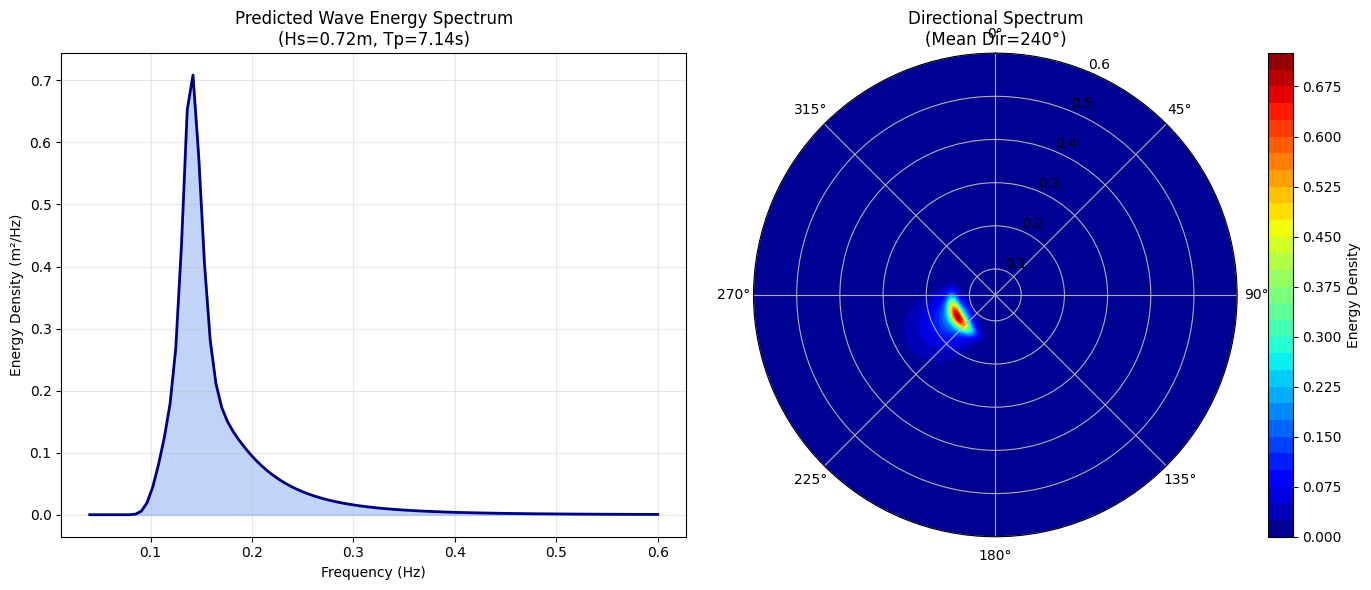

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. JONSWAP PHYSICS FUNCTIONS
# ==========================================
def jonswap_spectrum(f, Hs, Tp, gamma=3.3):
    """
    Generates the 1D JONSWAP energy density spectrum.
    """
    fp = 1.0 / Tp # Peak frequency
    sigma = np.where(f <= fp, 0.07, 0.09)

    # Generalized Phillips constant approximation
    alpha = 0.076 * (Hs**2 / Tp**4)

    g = 9.81
    term1 = alpha * g**2 / ((2 * np.pi)**4 * f**5)
    term2 = np.exp(-1.25 * (f / fp)**(-4))

    # Peak enhancement
    # Avoid division by zero in arg calculation
    with np.errstate(divide='ignore', invalid='ignore'):
        arg = -((f - fp)**2) / (2 * (sigma * fp)**2)
        term3 = gamma ** np.exp(arg)

    S = term1 * term2 * term3

    # Replace NaNs (if any) with zeros
    S = np.nan_to_num(S)

    # Normalize S to match input Hs exactly
    if np.sum(S) > 0:
        m0 = np.trapz(S, f)
        current_Hs = 4 * np.sqrt(m0)
        if current_Hs > 0:
            S = S * (Hs / current_Hs)**2

    return S

def directional_spreading(theta, mean_direction, s=20):
    """
    Cosine-squared spreading function.
    """
    dtheta = theta - mean_direction
    # Wrap angle difference to [-pi, pi]
    dtheta = (dtheta + np.pi) % (2 * np.pi) - np.pi
    D = np.cos(dtheta / 2)**(2 * s)
    return D

def plot_wave_spectrum(hs, tp, direction_degrees):
    """
    Plots the 2D Directional Spectrum.
    """
    print(f"Generating Plot for: Hs={hs:.2f}m, Tp={tp:.2f}s, Dir={direction_degrees:.0f}°")

    # 1. Setup Ranges
    freqs = np.linspace(0.04, 0.6, 100) # Frequency range (Hz)
    dirs_deg = np.linspace(0, 360, 360)
    dirs_rad = np.radians(dirs_deg)

    # Convert input direction to radians
    mean_dir_rad = np.radians(direction_degrees)

    # 2. Calculate Energy
    S_f = jonswap_spectrum(freqs, hs, tp)

    # 3. Spread Energy over Directions
    E_2d = np.zeros((len(freqs), len(dirs_rad)))
    for i, f in enumerate(freqs):
        spread = directional_spreading(dirs_rad, mean_dir_rad)
        E_2d[i, :] = S_f[i] * spread

    # 4. PLOTTING
    fig = plt.figure(figsize=(14, 6))

    # Plot 1: 1D Spectrum
    ax1 = fig.add_subplot(121)
    ax1.plot(freqs, S_f, color='navy', linewidth=2)
    ax1.fill_between(freqs, S_f, color='cornflowerblue', alpha=0.4)
    ax1.set_title(f"Predicted Wave Energy Spectrum\n(Hs={hs:.2f}m, Tp={tp:.2f}s)")
    ax1.set_xlabel("Frequency (Hz)")
    ax1.set_ylabel("Energy Density (m²/Hz)")
    ax1.grid(True, alpha=0.3)

    # Plot 2: 2D Polar Spectrum
    ax2 = fig.add_subplot(122, projection='polar')
    THETA, R = np.meshgrid(dirs_rad, freqs)

    # Use contourf for the heat map
    c = ax2.contourf(THETA, R, E_2d, levels=30, cmap='jet')

    # Compass settings
    ax2.set_theta_zero_location("N")
    ax2.set_theta_direction(-1)
    ax2.set_title(f"Directional Spectrum\n(Mean Dir={direction_degrees:.0f}°)")

    plt.colorbar(c, ax=ax2, label='Energy Density')
    plt.tight_layout()
    plt.show()

# ==========================================
# 2. GET PREDICTION FROM USER'S MODEL
# ==========================================
# We assume 'y_pred_real' and 'y_test_real' exist from your previous training run.
# We will grab the very last prediction in the test set to show the "Latest Forecast"

# If variables are not in memory, we define dummy values for testing:
try:
    # Try to grab the last value from the arrays in memory
    last_hs = y_pred_real[-1, 0]
    last_tp = y_pred_real[-1, 1]
    last_dir = y_pred_real[-1, 2]

    # Safety check for directions (sometimes models predict >360 or <0)
    last_dir = last_dir % 360

    print("Using prediction from trained LSTM model.")

except NameError:
    # Fallback if arrays aren't in memory
    print("Model variables not found. Using example values.")
    last_hs = 2.5
    last_tp = 8.0
    last_dir = 225

# ==========================================
# 3. RUN VISUALIZATION
# ==========================================
plot_wave_spectrum(last_hs, last_tp, last_dir)

In [24]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score

# ==========================================
# 1. CONFIGURATION
# ==========================================
LOOKBACK = 24
LEAD_TIMES = [6, 12, 18]
FEATURE_COLS = ['msl', 'sst', 'wind_speed', 'swh', 'mwp', 'mwd']

# ==========================================
# 2. HELPER FUNCTIONS
# ==========================================
def create_dataset(dataset, look_back, lead_time):
    X, y = [], []
    # Stop early enough to have both past (X) and future (y)
    for i in range(look_back, len(dataset) - lead_time):
        X.append(dataset[i-look_back:i])       # Input: Past 24h
        y.append(dataset[i + lead_time, 3:6])  # Target: Future (i + lead_time)
    return np.array(X), np.array(y)

def calculate_adjusted_r2(y_true, y_pred, n_samples, n_predictors):
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_predictors - 1)
    return r2, adj_r2

# ==========================================
# 3. MAIN LOOP (6h, 12h, 18h)
# ==========================================
print(f"{'Lead Time':<10} | {'Metric':<20} | {'R2 Score':<10} | {'Adj. R2':<10} | {'Baseline':<10}")
print("="*75)

for lead in LEAD_TIMES:
    # A. Generate Data for this specific lead time
    X_train, y_train = create_dataset(train_scaled, LOOKBACK, lead)
    X_test, y_test = create_dataset(test_scaled, LOOKBACK, lead)

    # B. Flatten Data for XGBoost (Samples, Time*Features)
    nsamples, ntime, nfeatures = X_train.shape
    X_train_flat = X_train.reshape((nsamples, ntime*nfeatures))
    X_test_flat = X_test.reshape((X_test.shape[0], ntime*nfeatures))

    # C. Train XGBoost
    # Using n_jobs=-1 to use all CPU cores for speed
    xgb_model = MultiOutputRegressor(XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=6, n_jobs=-1))
    xgb_model.fit(X_train_flat, y_train)

    # D. Predict & Inverse Transform
    y_pred_scaled = xgb_model.predict(X_test_flat)
    y_pred_real = target_scaler.inverse_transform(y_pred_scaled)
    y_test_real = target_scaler.inverse_transform(y_test)

    # E. Calculate Scores (Wave Height Only for Brevity)
    # Number of predictors = Lookback * Features (24 * 6 = 144)
    n_predictors = ntime * nfeatures

    swh_r2, swh_adj_r2 = calculate_adjusted_r2(
        y_test_real[:,0], y_pred_real[:,0],
        X_test.shape[0], n_predictors
    )

    # F. Calculate Baseline (Persistence)
    # Compare y_test (t + lead) with input X (t)
    # X_test[:,-1,3] is the Wave Height at time t (last step of input window)
    last_known_swh_scaled = X_test[:, -1, 3]

    # Manual inverse scale for single column
    min_swh = target_scaler.data_min_[0]
    max_swh = target_scaler.data_max_[0]
    last_known_swh_real = last_known_swh_scaled * (max_swh - min_swh) + min_swh

    baseline_r2 = r2_score(y_test_real[:,0], last_known_swh_real)

    # G. Print Row
    print(f"{lead} Hours    | Wave Height (SWH)    | {swh_r2:.4f}     | {swh_adj_r2:.4f}     | {baseline_r2:.4f}")

print("="*75)

Lead Time  | Metric               | R2 Score   | Adj. R2    | Baseline  
6 Hours    | Wave Height (SWH)    | 0.9821     | 0.9819     | 0.9769
12 Hours    | Wave Height (SWH)    | 0.9638     | 0.9635     | 0.9550
18 Hours    | Wave Height (SWH)    | 0.9483     | 0.9478     | 0.9377
